<a href="https://colab.research.google.com/github/ToshiroHJJZ/Machine_Learning_in_the_Cloud/blob/main/LR_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

### Import necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score



from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Load a dataset
data = pd.read_csv("/content/drive/MyDrive/car_data/data.csv")

In [ ]:
# Check data
data.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?

In [ ]:
data.shape

(11914, 16)

In [ ]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
#check data rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?

In [ ]:
data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?

In [ ]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

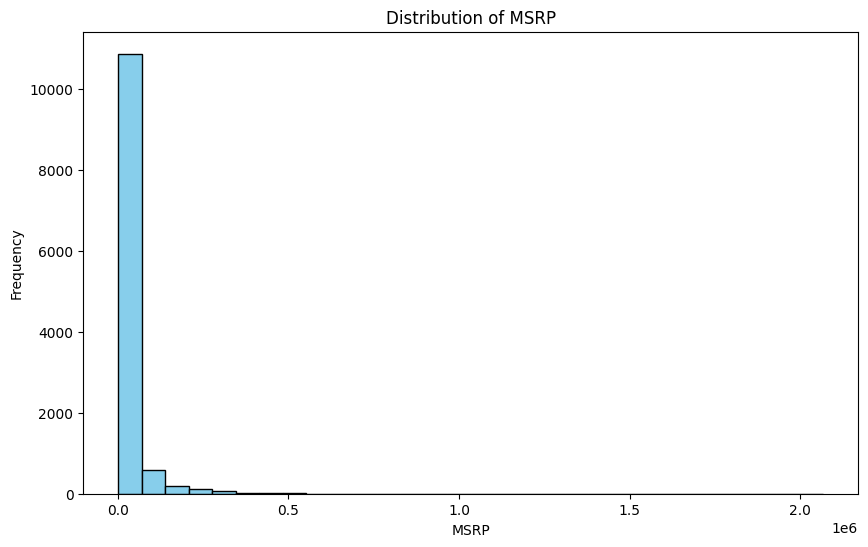

In [ ]:
# prompt: plot a histogram for MSRP

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['MSRP'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.title('Distribution of MSRP')
plt.show()

### Relationships Between Features:
- Are there correlations between the numerical variables?

- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?

In [ ]:
# prompt: correlation table and heatmap of numerical variables

import matplotlib.pyplot as plt
# Correlation table
data1 = data.select_dtypes(include=[np.number])
correlation_matrix = data1.corr()
print(correlation_matrix)

                      Year  Engine HP  Engine Cylinders  Number of Doors  \
Year              1.000000   0.351794         -0.041479         0.263787   
Engine HP         0.351794   1.000000          0.779988        -0.102713   
Engine Cylinders -0.041479   0.779988          1.000000        -0.140088   
Number of Doors   0.263787  -0.102713         -0.140088         1.000000   
highway MPG       0.258240  -0.406563         -0.621606         0.118570   
city mpg          0.198171  -0.439371         -0.600776         0.120881   
Popularity        0.073049   0.037501          0.041145        -0.048272   
MSRP              0.227590   0.662008          0.531312        -0.126635   

                  highway MPG  city mpg  Popularity      MSRP  
Year                 0.258240  0.198171    0.073049  0.227590  
Engine HP           -0.406563 -0.439371    0.037501  0.662008  
Engine Cylinders    -0.621606 -0.600776    0.041145  0.531312  
Number of Doors      0.118570  0.120881   -0.048272 -0.1266

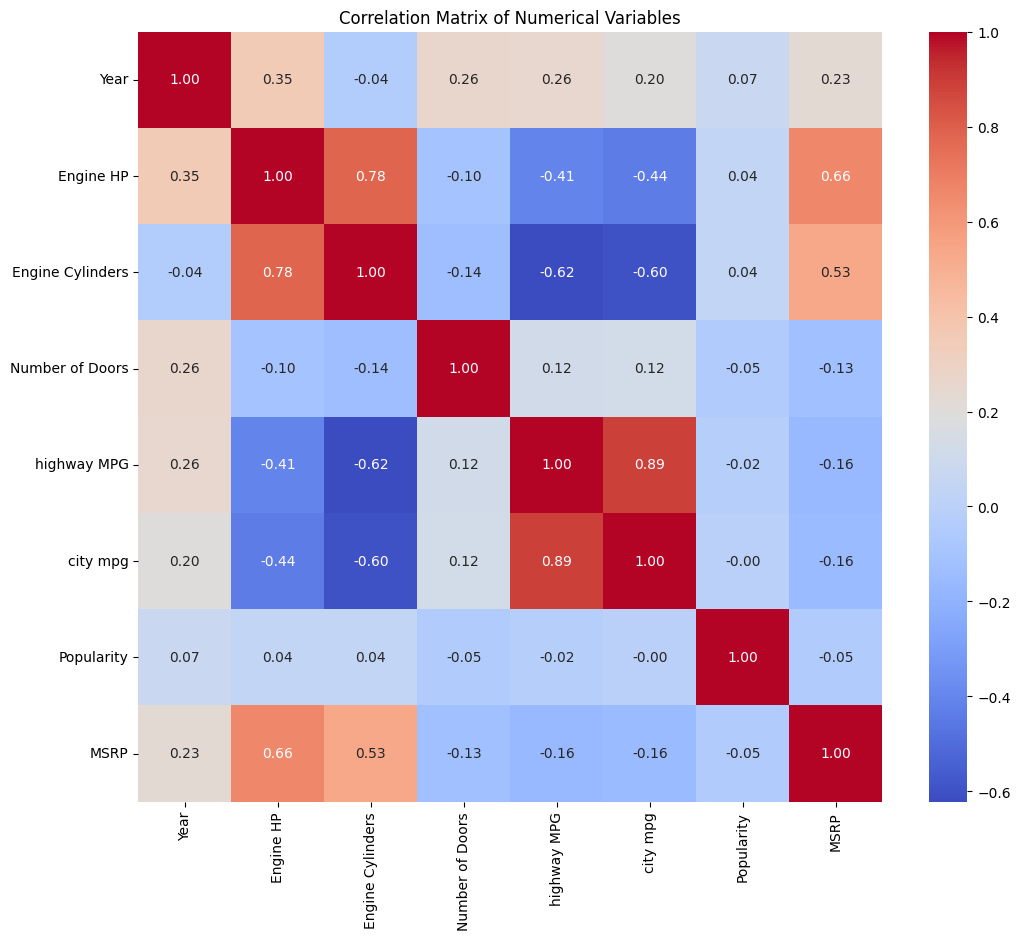

In [ ]:
# Heatmap
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [ ]:
# There is a high correlation between the Engigne Cylinders and the Engigne HP (0.779988).
# There is a low correlation between highway MPG and and Engigne Cylinders
# Only Engigne HP and Engigne Cylinders seem to have a positive correlation with MSRP

## Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

Below are some of the methods of treating the outliers:

#### Method 1: Trimming/Remove the outliers

In this technique, we remove the outliers from the dataset. Although it is not a good practice to follow.


#### Method 2: Quantile Based Flooring and Capping

In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value. Python code to delete the outlier and copy the rest of the elements to another array.


#### Method 3: Mean/Median Imputation

As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.



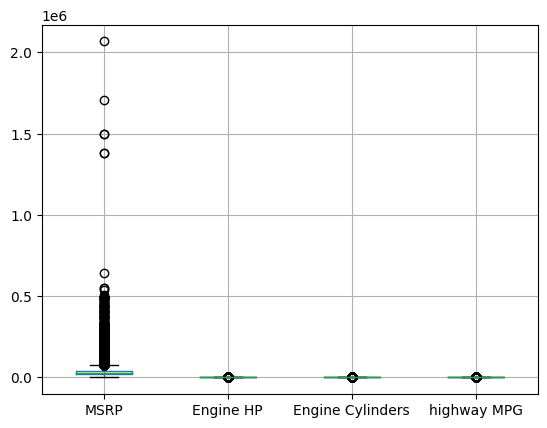

In [ ]:
boxplot = data.boxplot(column=['MSRP', 'Engine HP', 'Engine Cylinders', 'highway MPG'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

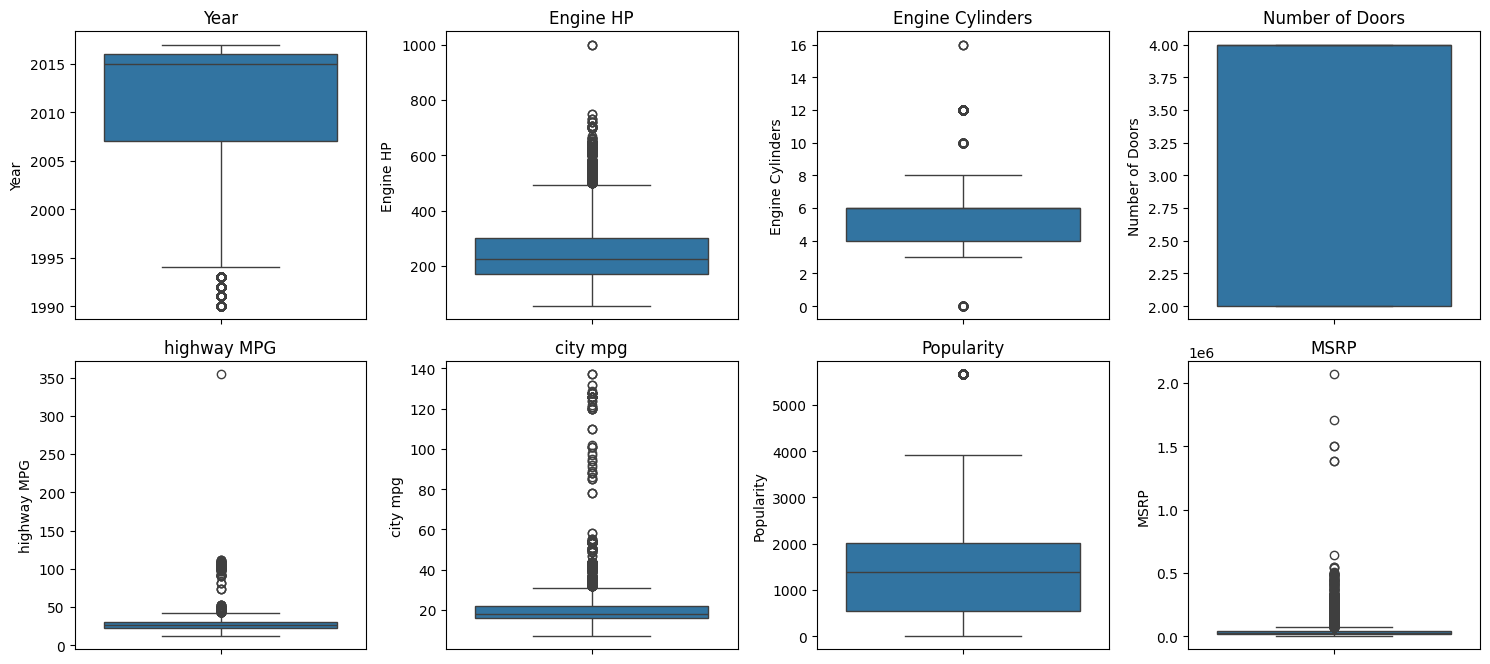

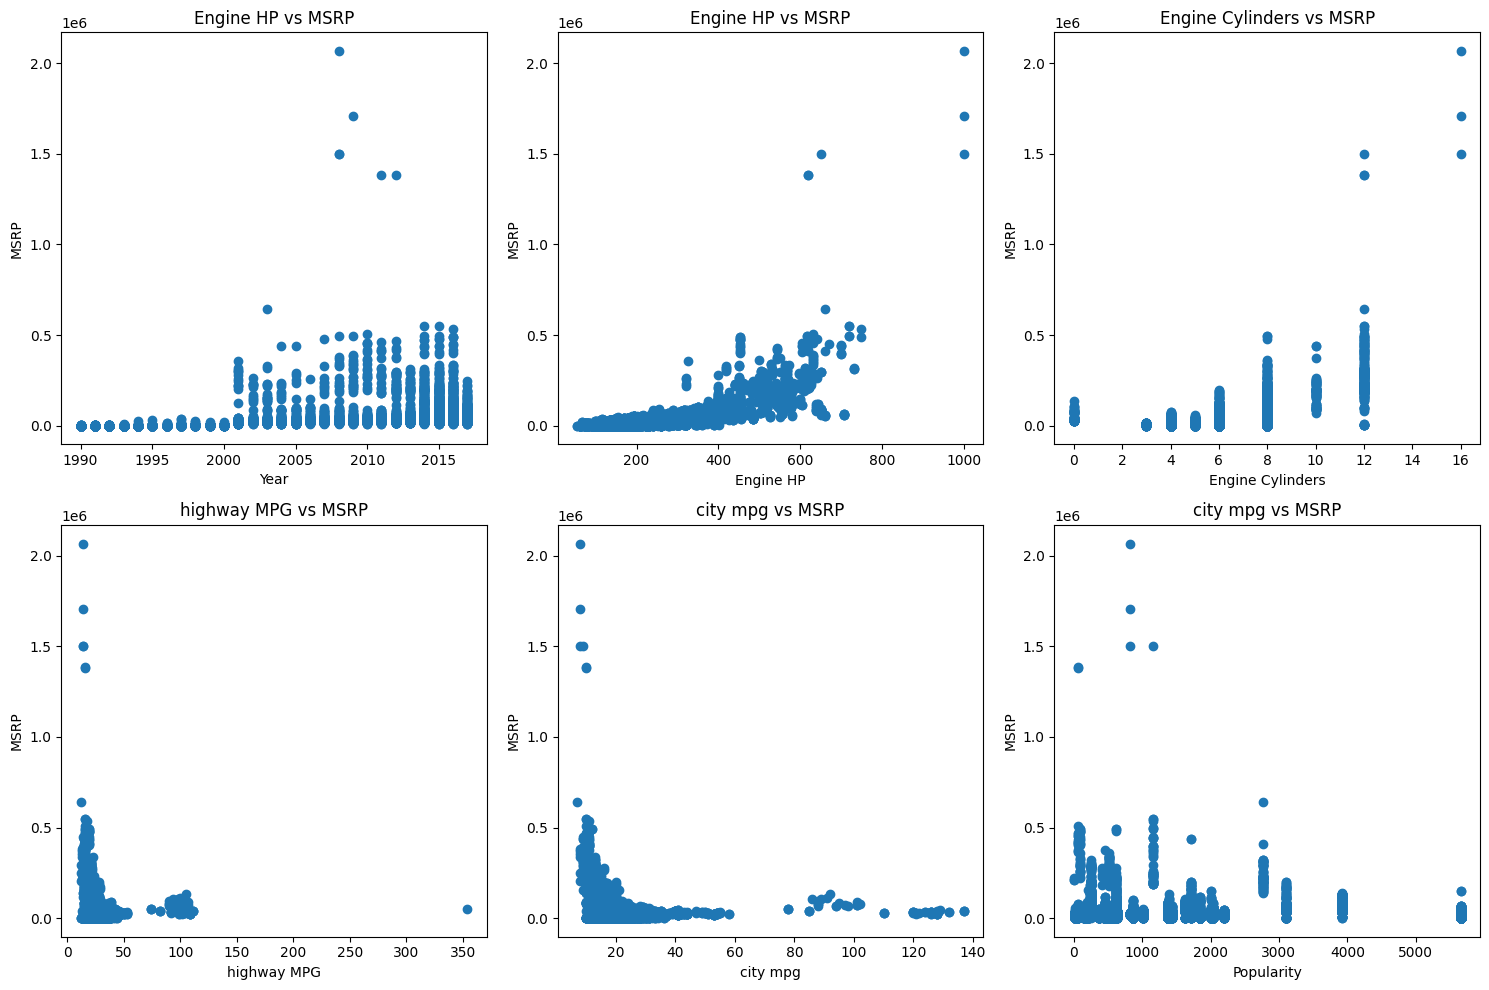

In [ ]:
# prompt: boxplots or scatter plots to identify potential outliers

import matplotlib.pyplot as plt
import numpy as np
# Boxplots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.select_dtypes(include=np.number).columns):
  plt.subplot(3, 4, i + 1)
  sns.boxplot(y=data[col])
  plt.title(col)
plt.tight_layout()
plt.show()

# Scatter plots to visualize relationships between features and potential outliers
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(data['Year'], data['MSRP'])
plt.xlabel('Year')
plt.ylabel('MSRP')
plt.title('Engine HP vs MSRP')

plt.subplot(2, 3, 2)
plt.scatter(data['Engine HP'], data['MSRP'])
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.title('Engine HP vs MSRP')

plt.subplot(2, 3, 3)
plt.scatter(data['Engine Cylinders'], data['MSRP'])
plt.xlabel('Engine Cylinders')
plt.ylabel('MSRP')
plt.title('Engine Cylinders vs MSRP')

plt.subplot(2, 3, 4)
plt.scatter(data['highway MPG'], data['MSRP'])
plt.xlabel('highway MPG')
plt.ylabel('MSRP')
plt.title('highway MPG vs MSRP')

plt.subplot(2,3,5)
plt.scatter(data['city mpg'], data['MSRP'])
plt.xlabel('city mpg')
plt.ylabel('MSRP')
plt.title('city mpg vs MSRP')

plt.subplot(2,3,6)
plt.scatter(data['Popularity'], data['MSRP'])
plt.xlabel('Popularity')
plt.ylabel('MSRP')
plt.title('city mpg vs MSRP')

plt.tight_layout()
plt.show()

In [ ]:
# split numerical values and categorical values
numerical_features = [data.columns[i] for i in range(len(data.columns)) if data.dtypes[i] != 'object']
categorical_features = [col for col in data.columns if col not in numerical_features]

<ipython-input-17-07dbec5d3867>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numerical_features = [data.columns[i] for i in range(len(data.columns)) if data.dtypes[i] != 'object']
<ipython-input-17-07dbec5d3867>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numerical_features = [data.columns[i] for i in range(len(data.columns)) if data.dtypes[i] != 'object']
<ipython-input-17-07dbec5d3867>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [ ]:
import pandas as pd

# Calculate quartiles
for col in numerical_features:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)

  # Calculate IQR
  IQR = Q3 - Q1

  # Define upper and lower bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Find outliers
  outliers = data[(data[col] >= lower_bound) | (data[col] <= upper_bound)]

  print("Outliers:")
  print(outliers)
  outliers.count()

Outliers:
          Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type

In [ ]:
# There are some a lot of outliers and since there are a lot of them they should be dealt another way!!!

### Data Cleaning:
- Are there any issues in the data that need to be cleaned?

- Are there duplicated rows that should be removed?

In [ ]:
# There ma be some duplicated values and the many outliers.
# Data Cleaning
data.duplicated().sum()


715

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

### Split into features and target

In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [ ]:
# split data into features and target
x = data.drop(columns=['MSRP'], axis = 1)
# Fit and transform the target variable
y = scaler.fit_transform(data['MSRP'].values.reshape(-1, 1))
# or y = data['MSRP']

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11196 non-null  object 
 4   Engine HP          11130 non-null  float64
 5   Engine Cylinders   11169 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11193 non-null  float64
 9   Market Category    7823 non-null   object 
 10  Vehicle Size       11199 non-null  object 
 11  Vehicle Style      11199 non-null  object 
 12  highway MPG        11199 non-null  int64  
 13  city mpg           11199 non-null  int64  
 14  Popularity         11199 non-null  int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 1.4+ MB


### Feature Engineering

In [ ]:
# Identify numerical and categorical columns
numerical_features = [data.columns[i] for i in range(len(data.columns)) if data.dtypes[i] != 'object']
categorical_features = [col for col in data.columns if col not in numerical_features]

<ipython-input-25-2ca961ecbecc>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numerical_features = [data.columns[i] for i in range(len(data.columns)) if data.dtypes[i] != 'object']
<ipython-input-25-2ca961ecbecc>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numerical_features = [data.columns[i] for i in range(len(data.columns)) if data.dtypes[i] != 'object']
<ipython-input-25-2ca961ecbecc>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [ ]:
# or use this method, 'Identify numerical and categorical columns'
numerical_features = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg' ,'Popularity']
categorical_features = ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']

### Preprocessing Pipelines

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Preprocessing pipeline for y
y_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize the target variable
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features),
    #('y', y_transformer, df1.MSRP)
])

### Create a function to build and evaluate models using pipelines

In [ ]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    # Fit the model
    model.fit(x_train, y_train)

    # Predict on test set
    y_pred = model.predict(x_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.named_steps['model'].__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model pipelines

In [ ]:
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=2)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

### Evaluate all models

In [ ]:
for model in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(model, x_train, x_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 0.0372
R² Score: 0.9709
--------------------------------------------------
Model: Ridge
Mean Squared Error: 0.1058
R² Score: 0.9173
--------------------------------------------------
Model: Lasso
Mean Squared Error: 0.8203
R² Score: 0.3590
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: SGDRegressor
Mean Squared Error: 0.5154
R² Score: 0.5972
--------------------------------------------------
Model: LinearRegression
Mean Squared Error: 0.0670
R² Score: 0.9476
--------------------------------------------------


### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

From best to worst: LinReg, Ridge, SGDReg, PolyReg, Lasso.

It makes sense PolyReg performed worse than LinReg because LinReg performed so well, that means the model is closer to a line, which means less of a polynomial curve. Ridge Regression was only marginally worse compared to LinReg and Lasso in terms of both MSE and R^2 but still a strong fit. SGDReg and PolyReg have significantly lower R^2 and higher MSE.

Ridge performed worse because it applies L2 regularization that penalizes overfitting that insteads prevents it from fully capturing the data's variance compared to LinReg.

Lasso performed worse to LinReg as it applies L1 regularization that helps when there's irrelevant features. The convergence warning indicates that the number of iterations used by the optimization technique to obtain a solution was insufficient. A complex relationship in the data or a huge number of features could be the cause of this. This can be fixed by increasing the iterations or changing the tolerance.

Iterative optimization techniques like stochastic gradient descent (SGD) perform well on big datasets but have issues with precision and convergence, particularly when using the default settings. The reason for its lower R² score and greater MSE could be that it did not find the optimal solution or fully converge. That can happen because of problems with the learning rate where it may overshoot the ideal answer or converge too slowly if the learning rate is set too high or too low. It can also happen because small batch processing of the data adds a degree of unpredictability that may reduce the accuracy of the answer, particularly with smaller datasets.

### Submission Requirements:

Submit your Jupyter notebook with the code for all models on Moodle using Github.
Include clear markdown cells explaining your approach, observations from EDA, preprocessing steps, and a detailed discussion of the results.